<a href="https://colab.research.google.com/github/adeebkhaan/Resume/blob/main/Cat_vs__Non_cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import copy
import h5py
import matplotlib.pyplot as plt

In [2]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [4]:
train_set_x_orig, y_train, test_set_x_orig, y_test, classes = load_dataset()

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


y = [1], it's a 'cat' picture.


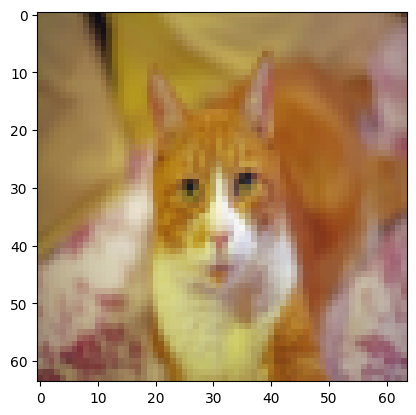

In [6]:
# Example of a picture
index = 24
plt.imshow(train_set_x_orig[index])
print ("y = " + str(y_train[:, index]) + ", it's a '" + classes[np.squeeze(y_train[:, index])].decode("utf-8") +  "' picture.")

In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape( test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [ ]:
x_train = train_set_x_flatten / 255.
x_test = test_set_x_flatten / 255.

In [ ]:
def sigmoid(z):
  a = 1/ (1 + np.exp(-z))
  return a

In [ ]:
def initialize_with_zeros(dim):
  w = np.zeros([dim, 1])
  b = 0.

  return w,b

In [ ]:
def propagation(w,b,X,Y,lambdA ):
  m = X.shape[1]

  y_hat = sigmoid(np.dot(w.T,X) + b)
  cost = np.sum(-Y * np.log(y_hat) - (1- Y) * np.log(1 - y_hat))/m + np.sum(np.square(w))*lambdA/(2*m)

  dw = np.dot(X, (y_hat - Y).T)/m + np.sum(w)*(lambdA/2)
  db = np.sum(y_hat - Y)/m

  grads = {
      "dw":dw,
      "db":db
  }

  return grads, cost

In [ ]:
# w,b = initialize_with_zeros(x_train.shape[0])
# grads,cost = propagation(w,b,x_train,y_train)

In [ ]:
def optimization(w,b,X,Y,lambdA, learning_rate, num_iterations=2000,print_cost=False):
  costs = []

  for i in range(num_iterations):
    grads, cost = propagation(w,b,X,Y,lambdA)

    dw = grads["dw"]
    db = grads["db"]

    w = w - learning_rate * dw
    b = b - learning_rate * db

    if i % 100 == 0:
      costs.append(cost)

      if print_cost:
        print("Cost after iterations %i : %f" %(i, cost))

  params = {
      "w":w,
      "b":b
  }

  grads = {
      "dw":dw,
      "db":db
  }

  return params, grads, costs


In [ ]:
def predict(w,b,X):
  m = X.shape[1]
  Y_prediction = np.zeros([1,m])

  y_hat = sigmoid(np.dot(w.T, X) + b)

  for i in range(X.shape[1]):

    if y_hat[0,i] > 0.5:
      Y_prediction[0,i] = 1
    else:
      Y_prediction[0,i] = 0

  return Y_prediction

In [ ]:
def model(x_train, y_train, x_test, y_test,lambdA, learning_rate, num_iterations=2000, print_cost=False):

  w,b = initialize_with_zeros(x_train.shape[0])
  params, grads, costs = optimization(w,b, x_train, y_train,lambdA, learning_rate)
  w = params["w"]
  b = params["b"]

  Y_prediction_train = predict(w, b, x_train)
  Y_prediction_test = predict(w, b, x_test)

  if print_cost:

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))


  d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

  return d

In [ ]:
lambdA=0
logistic_regression = model(x_train, y_train, x_test, y_test,lambdA, learning_rate=0.005, print_cost=True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


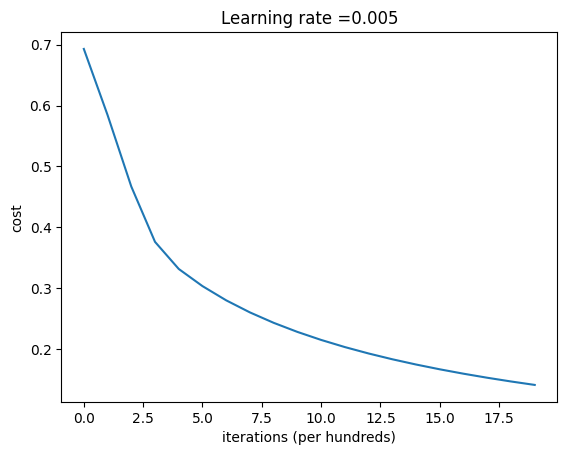

In [ ]:
costs = np.squeeze(logistic_regression['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression["learning_rate"]))
plt.show()

y = 1, you predicted that it is a "cat" picture.


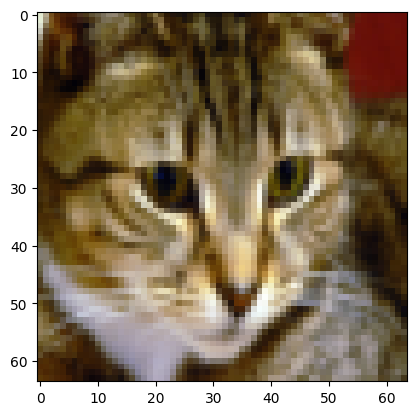

In [ ]:
# Let's get prediction from our model
index = 15
plt.imshow(x_test[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(y_test[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")